
===== Financial =====


,Changes in Receivables and Debts,Creditors,Cash,Result Before Special Items,Final Cash Balance
count,2.132400e+04,2.132400e+04,2.132400e+04,2.132400e+04,2.132400e+04
mean,3.603488e+02,8.393413e+02,-2.517558e+01,1.168887e+04,4.995679e+04
std,5.218606e+04,7.493555e+04,2.933222e+04,6.572037e+04,1.438756e+05
min,-2.093515e+06,-2.957182e+06,-1.718825e+06,-3.408642e+06,-2.189040e+06
25%,-1.144750e+04,-1.820700e+04,0.000000e+00,-1.380750e+03,-1.843825e+04
50%,2.320000e+02,0.000000e+00,0.000000e+00,8.147500e+03,2.360150e+04
75%,1.242650e+04,1.899050e+04,0.000000e+00,2.027975e+04,8.617800e+04
max,1.398853e+06,2.778042e+06,1.355956e+06,3.480701e+06,1.700096e+06


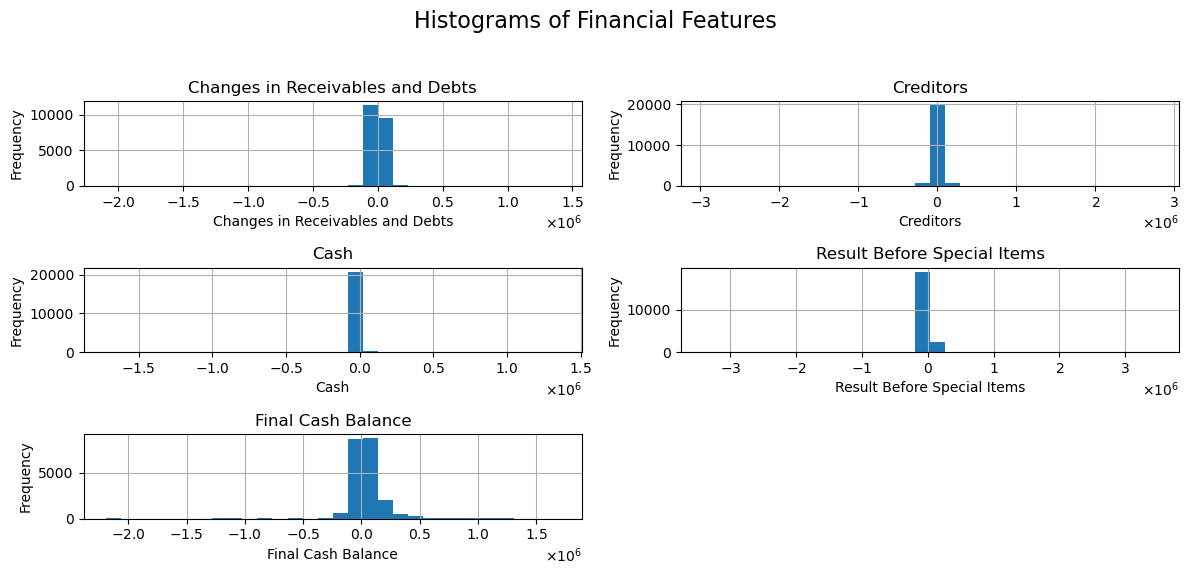

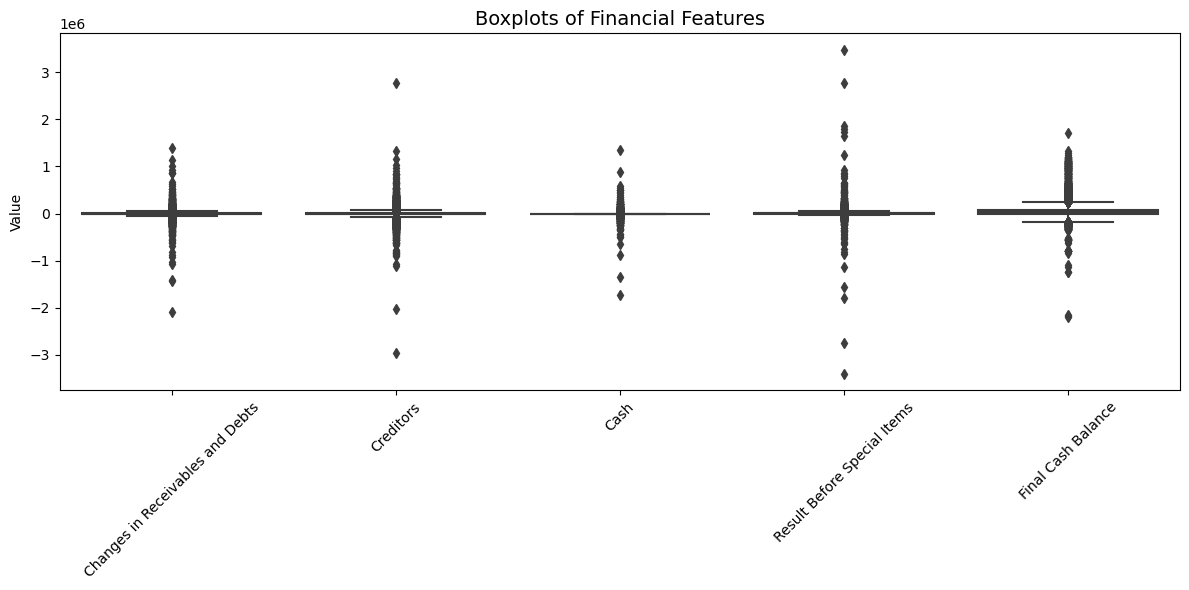


===== Milk =====


,Milk Price per kg,Milk Money Advance,Total Revenue
count,21324.000000,2.132400e+04,2.132400e+04
mean,0.458030,9.182163e+04,1.097286e+05
std,0.129835,5.543871e+04,7.643165e+04
min,0.000000,-7.012200e+04,-3.583000e+05
25%,0.370000,5.617750e+04,6.403350e+04
50%,0.445000,7.989100e+04,9.190000e+04
75%,0.524849,1.130385e+05,1.329410e+05
max,4.962000,1.349458e+06,1.523204e+06


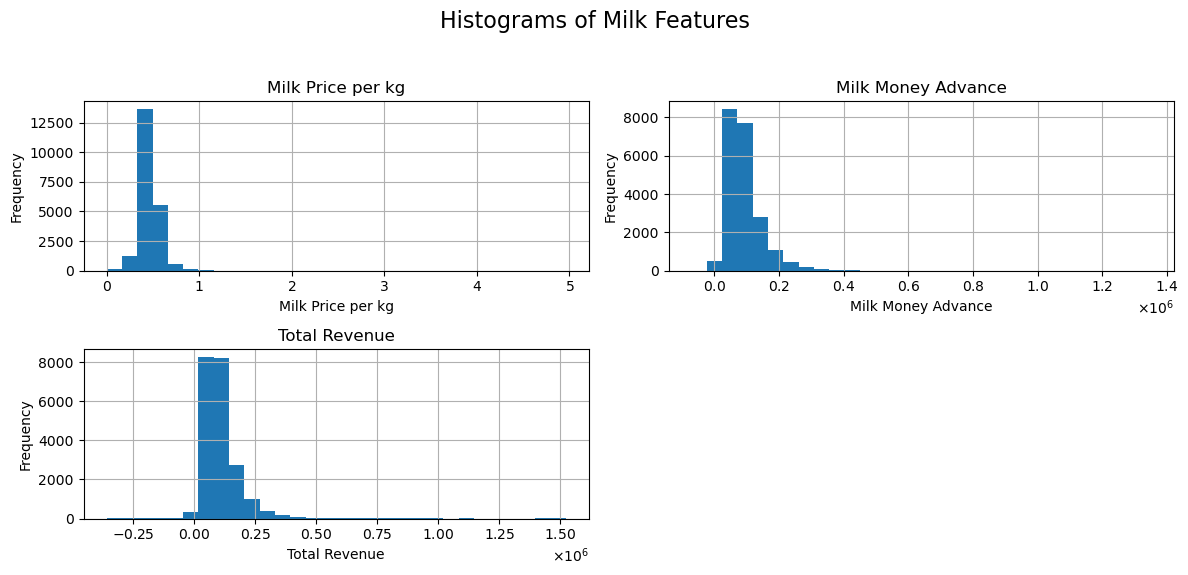

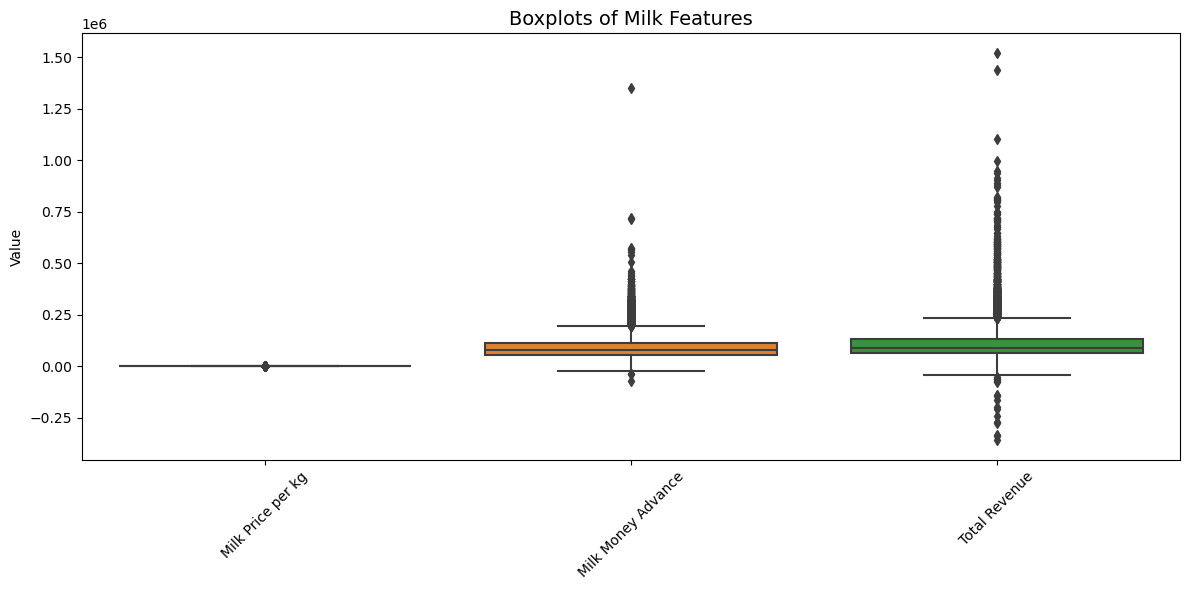


===== Livestock =====


,Number of Dairy Cows,Calves Died <14 Days
count,21324.000000,21324.000000
mean,103.439317,11.312999
std,73.297142,7.275585
min,0.000000,0.000000
25%,64.100000,6.000000
50%,104.800000,10.000000
75%,140.500000,15.000000
max,459.200000,54.000000


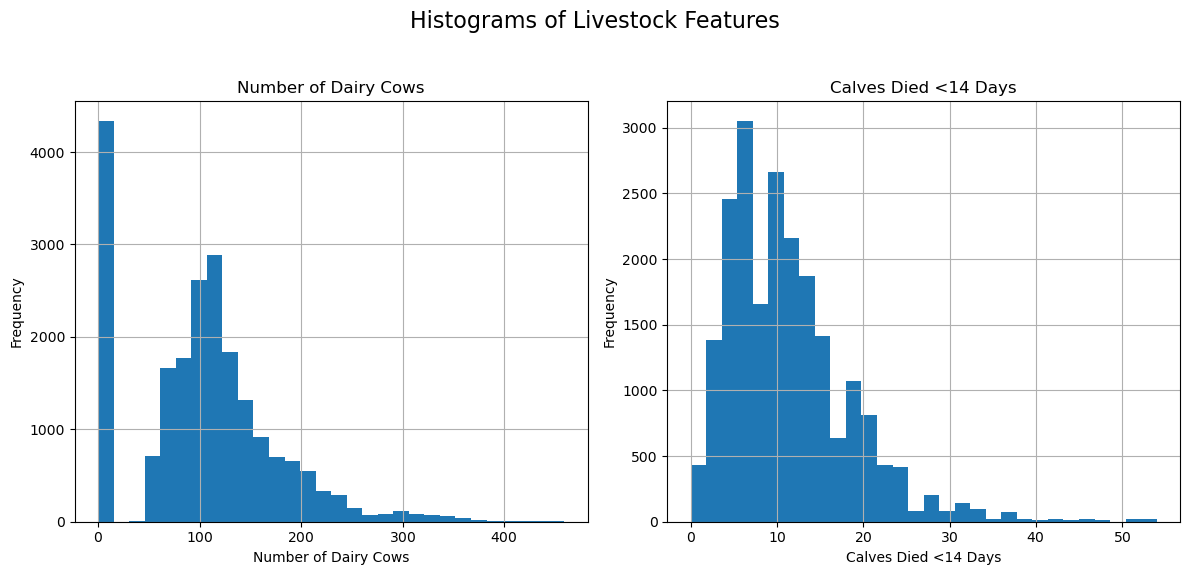

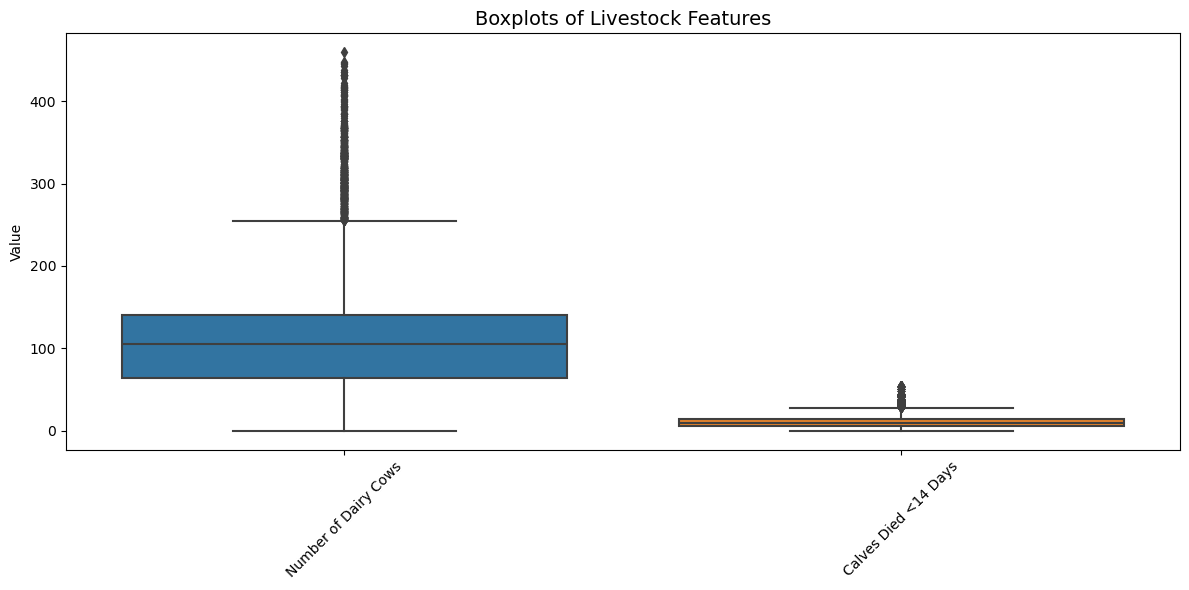


===== Weather =====


,Average Temperature (°C),Rainfall (mm)
count,21324.000000,21324.000000
mean,114.121949,744.240848
std,51.332542,366.252171
min,32.440000,112.750000
25%,66.890000,433.250000
50%,109.780000,772.750000
75%,162.440000,989.500000
max,203.670000,1636.250000


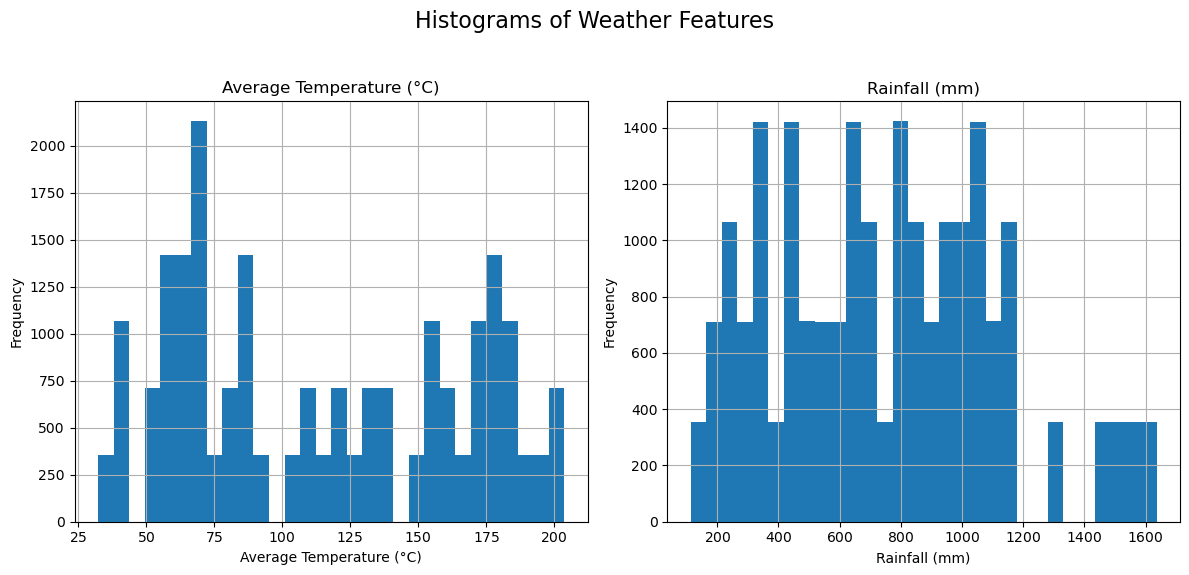

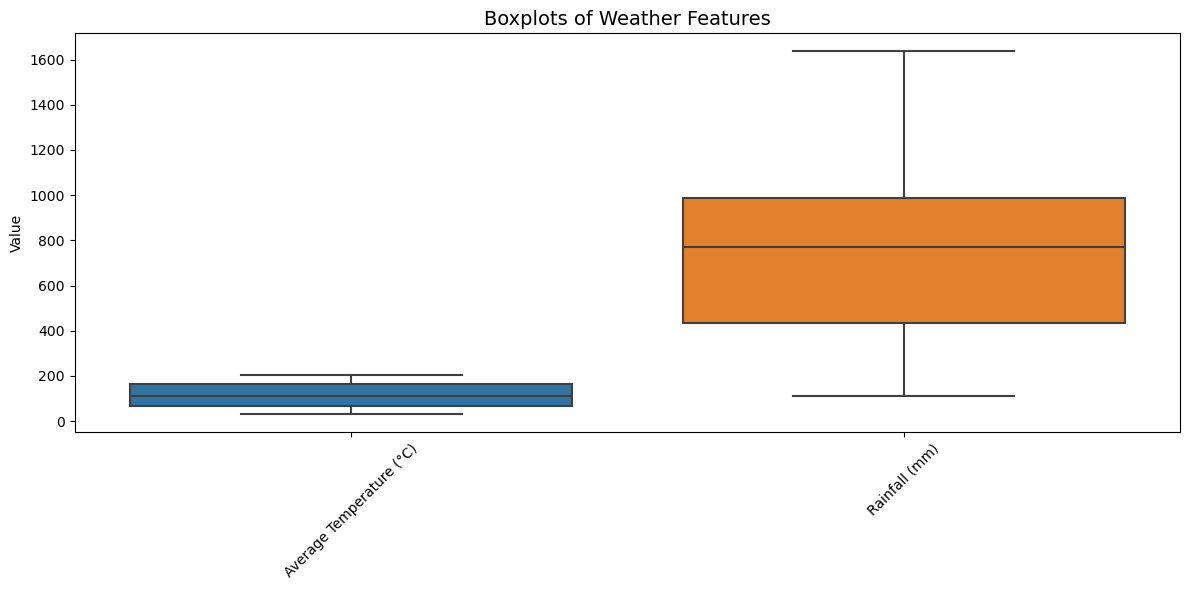

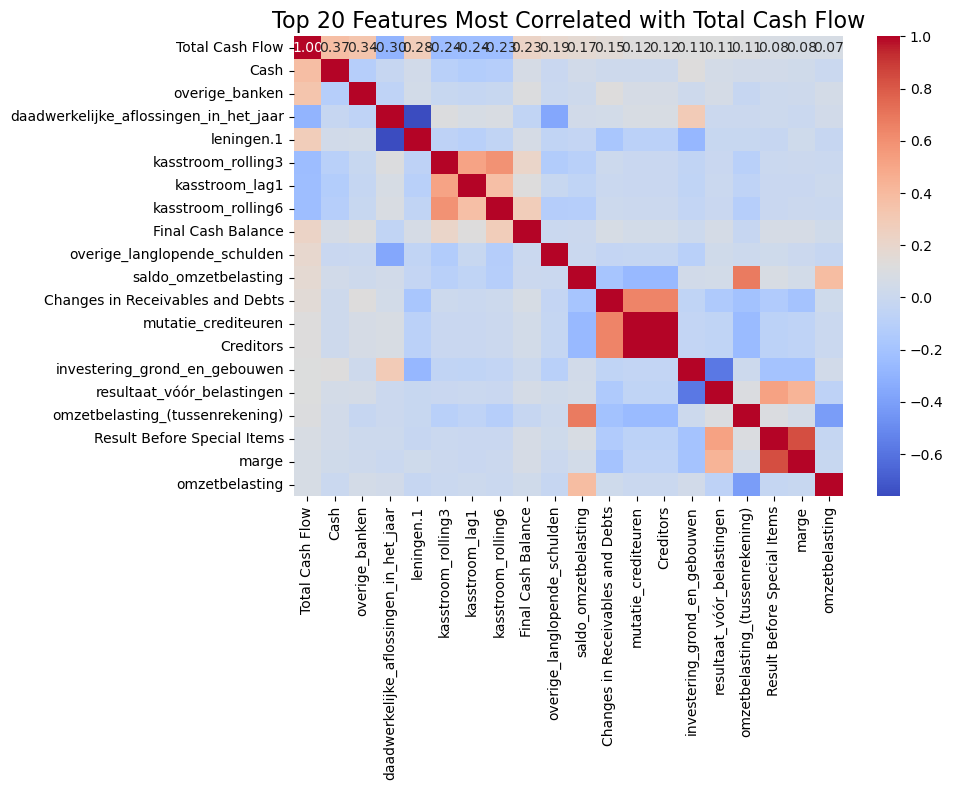

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


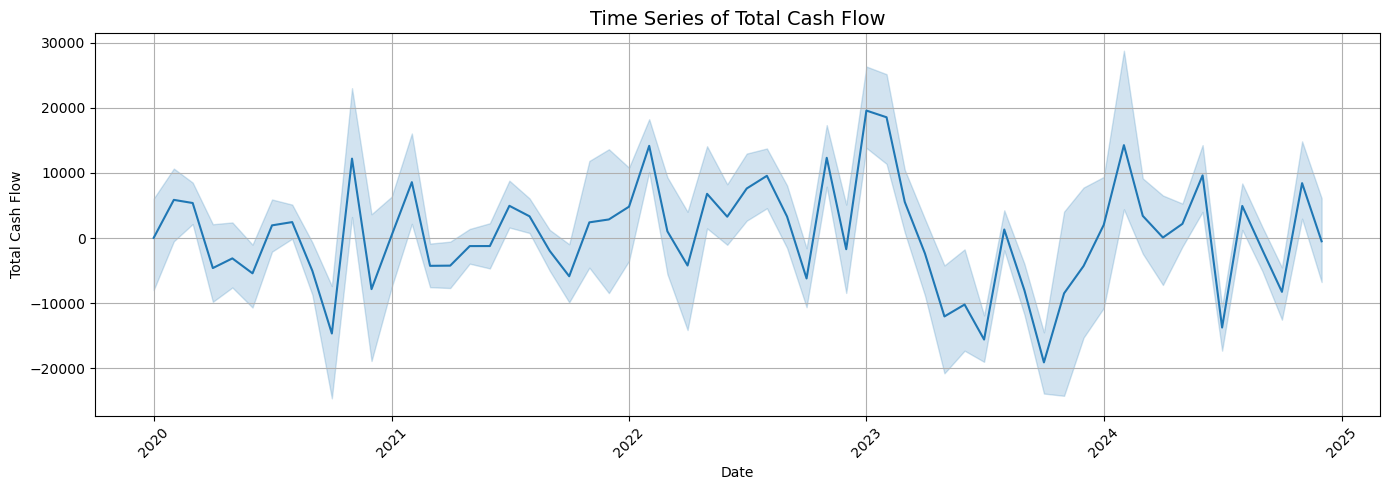

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


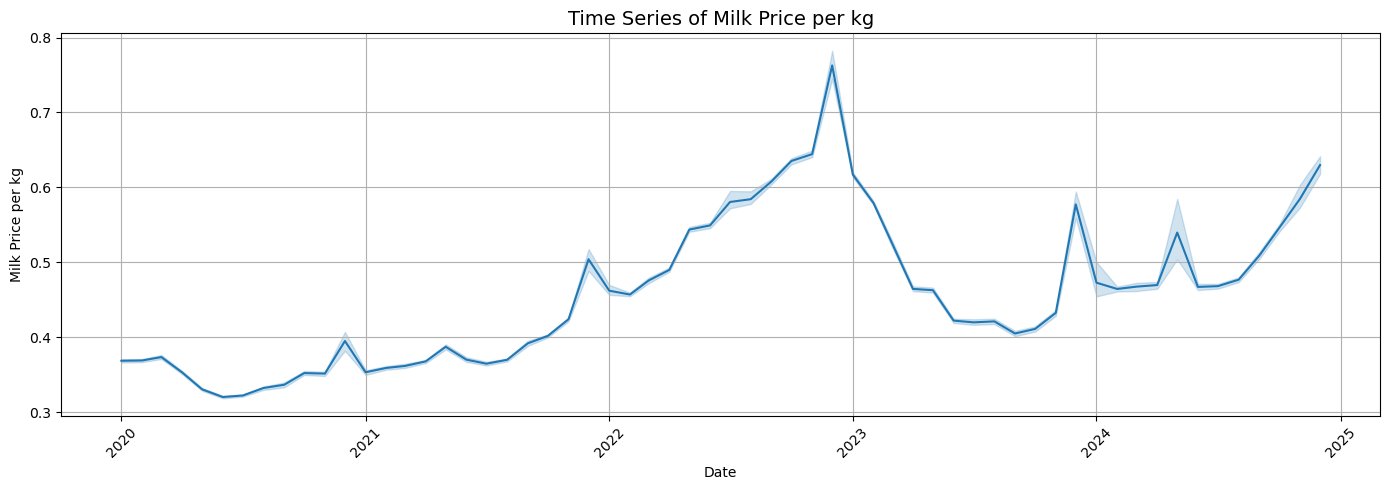

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


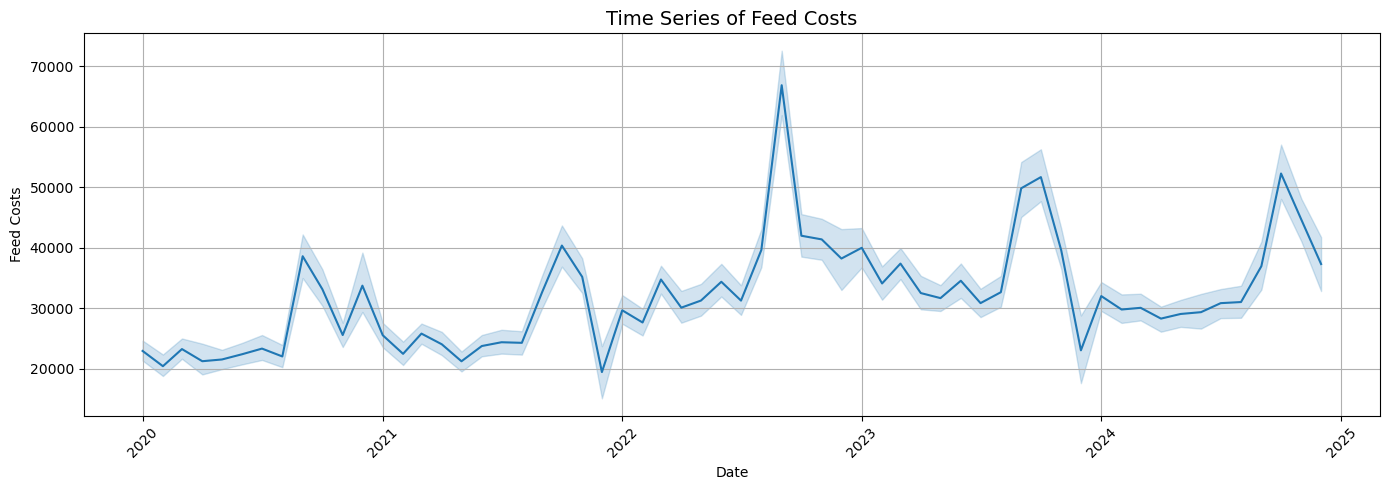

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter

# Load and prepare data
file_path = "data_with_clusters.csv"
df = pd.read_csv(file_path, parse_dates=["datum"])
df = df.sort_values("datum").reset_index(drop=True)

# Column translation map
column_name_map = {
    'mutaties_vorderingen_en_schulden': 'Changes in Receivables and Debts',
    'crediteuren': 'Creditors',
    'kas': 'Cash',
    'resultaat_vóór_bijzondere_resultaten': 'Result Before Special Items',
    'eindsaldo_liquide_middelen': 'Final Cash Balance',
    'melkprijs_per_kg': 'Milk Price per kg',
    'voorschot_melkgeld': 'Milk Money Advance',
    'totaal_opbrengsten': 'Total Revenue',
    'aantal_melkkoeien': 'Number of Dairy Cows',
    'aantal_kalveren_dood_tot_14_dagen': 'Calves Died <14 Days',
    'gemiddelde_temperatuur': 'Average Temperature (°C)',
    'neerslag_(mm)': 'Rainfall (mm)',
    'totale_kasstroom': 'Total Cash Flow',
    'voerkosten': 'Feed Costs'
}

# Grouping features
financial_features = [
    'mutaties_vorderingen_en_schulden', 'crediteuren', 'kas',
    'resultaat_vóór_bijzondere_resultaten', 'eindsaldo_liquide_middelen'
]
milk_features = ['melkprijs_per_kg', 'voorschot_melkgeld', 'totaal_opbrengsten']
livestock_features = ['aantal_melkkoeien', 'aantal_kalveren_dood_tot_14_dagen']
weather_features = ['gemiddelde_temperatuur', 'neerslag_(mm)']
target_column = 'totale_kasstroom'

feature_groups = {
    "Financial": financial_features,
    "Milk": milk_features,
    "Livestock": livestock_features,
    "Weather": weather_features
}

# Summary and Histograms
for group_name, features in feature_groups.items():
    english_labels = [column_name_map.get(f, f) for f in features]
    data = df[features].copy()
    data.columns = english_labels

    print(f"\n===== {group_name} =====")
    display(data.describe())

    # Histograms
    data.hist(bins=30, figsize=(12, 6))
    plt.suptitle(f"Histograms of {group_name} Features", fontsize=16)
    for ax, label in zip(plt.gcf().axes, english_labels):
        ax.set_xlabel(label)
        ax.set_ylabel("Frequency")
        ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Boxplots
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data)
    plt.title(f"Boxplots of {group_name} Features", fontsize=14)
    plt.ylabel("Value")
    plt.xticks(ticks=range(len(english_labels)), labels=english_labels, rotation=45)
    plt.tight_layout()
    plt.show()

# Correlation matrix with target
numeric_df = df.select_dtypes(include=["number"]).copy()
corr_matrix = numeric_df.corr()
top_corr = corr_matrix[target_column].abs().sort_values(ascending=False).head(20)
top_corr_features = top_corr.index
top_corr_english = [column_name_map.get(col, col) for col in top_corr_features]

# Prepare correlation plot
corr_subset = df[top_corr_features].copy()
corr_subset.columns = top_corr_english

plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 20 Features Most Correlated with Total Cash Flow", fontsize=16)
plt.tight_layout()
plt.show()

# Time series plots
time_series_cols = ['totale_kasstroom', 'melkprijs_per_kg', 'voerkosten']
for col in time_series_cols:
    english_col = column_name_map.get(col, col)
    plt.figure(figsize=(14, 5))
    sns.lineplot(x='datum', y=col, data=df)
    plt.title(f"Time Series of {english_col}", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel(english_col)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()


In [29]:
import pandas as pd

df = pd.read_csv("data_final.csv")
summary = df["totale_kasstroom"].describe()
print(summary)


count    2.132400e+04
mean     4.604203e+02
std      6.297287e+04
min     -2.119926e+06
25%     -1.104550e+04
50%      1.007500e+03
75%      1.327050e+04
max      2.242971e+06
Name: totale_kasstroom, dtype: float64


In [6]:
import pandas as pd

df = pd.read_csv("data_with_clusters.csv")

print(df.shape)
print(df.dtypes.value_counts())
print(df.isnull().sum().sort_values(ascending=False).head(15))


(21324, 238)
float64    219
bool        14
int64        4
object       1
Name: count, dtype: int64
kasstroom_rolling6                                      2136
kasstroom_rolling3                                      1068
kasstroom_lag3                                          1068
kasstroom_lag1                                           356
koesaldo_per_kg_fosfaat                                    0
kg_vet_en_eiwit_per_melkkoe                                0
kg_per_melkkoe_(incl_jongvee)                              0
kg_mengvoer_per_100_kg_melk                                0
kosten_machines_(en_installaties)_en_loonwerk_per_ha       0
kg_afgeleverde_melk_per_kg_fosfaat                         0
jongvee_ouder_dan_1_jaar_-_aantal_gemiddeld                0
jongvee_ouder_dan_1_jaar_-_aantal_beginbalans              0
jongvee_jonger_dan_1_jaar_-_aantal_gemiddeld               0
grasland                                                   0
gewasbeschermingsmiddelen.1                    

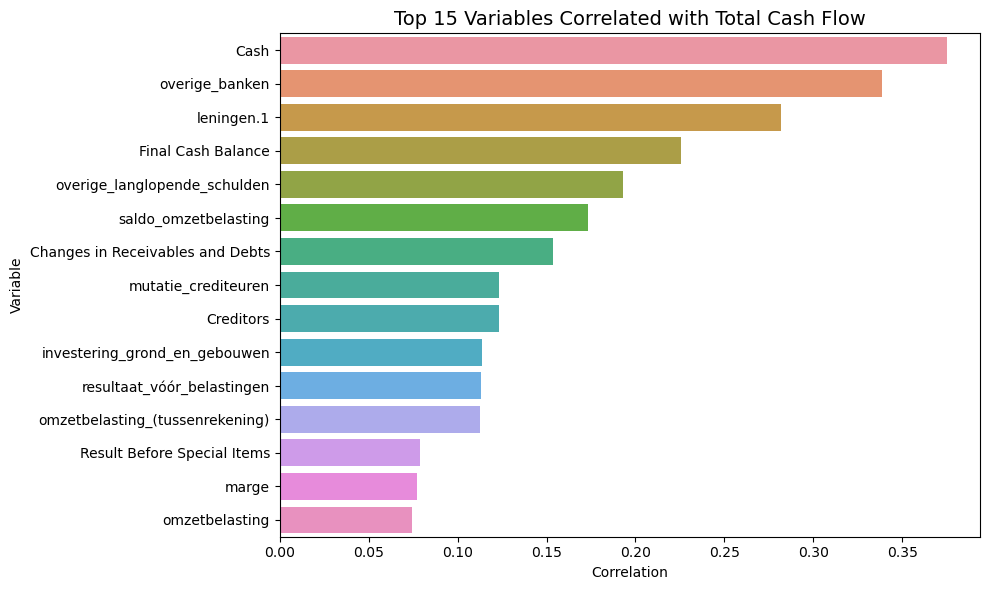

In [3]:

corrs = df.corr(numeric_only=True)["totale_kasstroom"].sort_values(ascending=False)
top_15 = corrs[1:16]  


top_15_english = top_15.rename(index=lambda x: column_name_map.get(x, x))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_english.values, y=top_15_english.index)
plt.title("Top 15 Variables Correlated with Total Cash Flow", fontsize=14)
plt.xlabel("Correlation")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


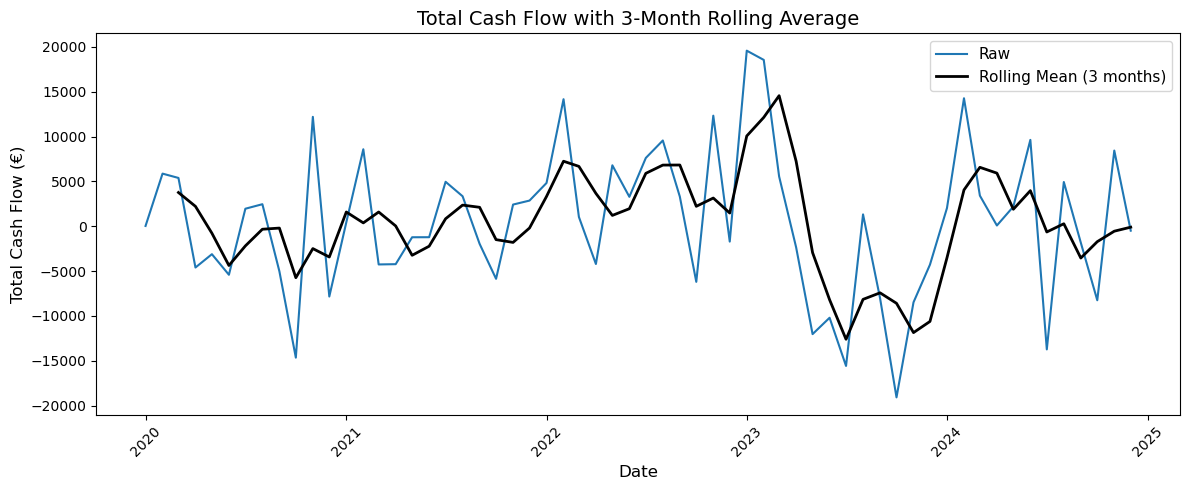

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

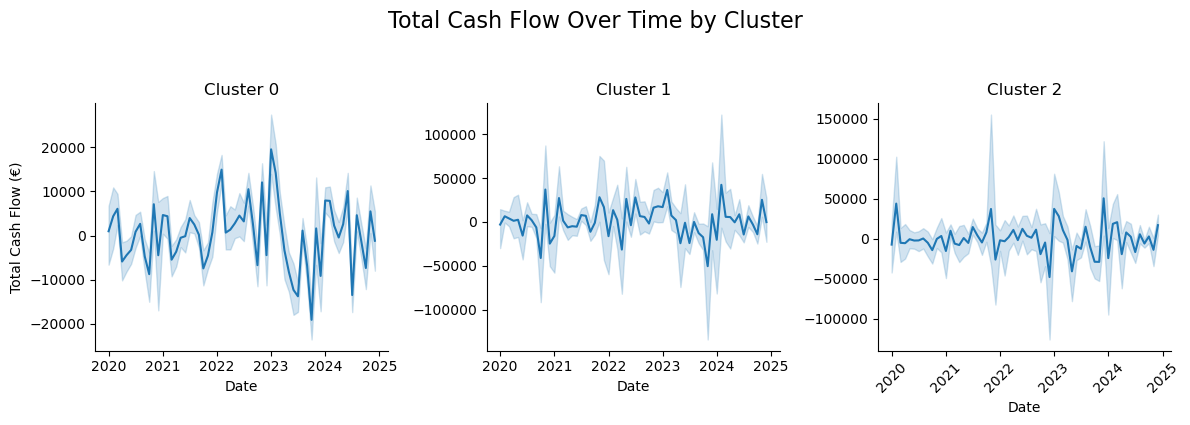

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate 3-month rolling average of total cash flow per farm
df['cash_flow_rolling'] = df.groupby("volgnr")["totale_kasstroom"].transform(lambda x: x.rolling(3).mean())

# Calculate monthly average across all farms
df_avg = df.groupby("datum")[["totale_kasstroom", "cash_flow_rolling"]].mean()

# Plot overall time series with rolling average
plt.figure(figsize=(12, 5))
plt.plot(df_avg.index, df_avg["totale_kasstroom"], label="Raw", linewidth=1.5)
plt.plot(df_avg.index, df_avg["cash_flow_rolling"], label="Rolling Mean (3 months)", color="black", linewidth=2)
plt.title("Total Cash Flow with 3-Month Rolling Average", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Cash Flow (€)", fontsize=12)
plt.legend(fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Per-cluster time series plots
g = sns.FacetGrid(df, col="bedrijf_cluster", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="datum", y="totale_kasstroom")
g.set_titles("Cluster {col_name}", size=12)
g.set_axis_labels("Date", "Total Cash Flow (€)")
g.fig.suptitle("Total Cash Flow Over Time by Cluster", fontsize=16, y=1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


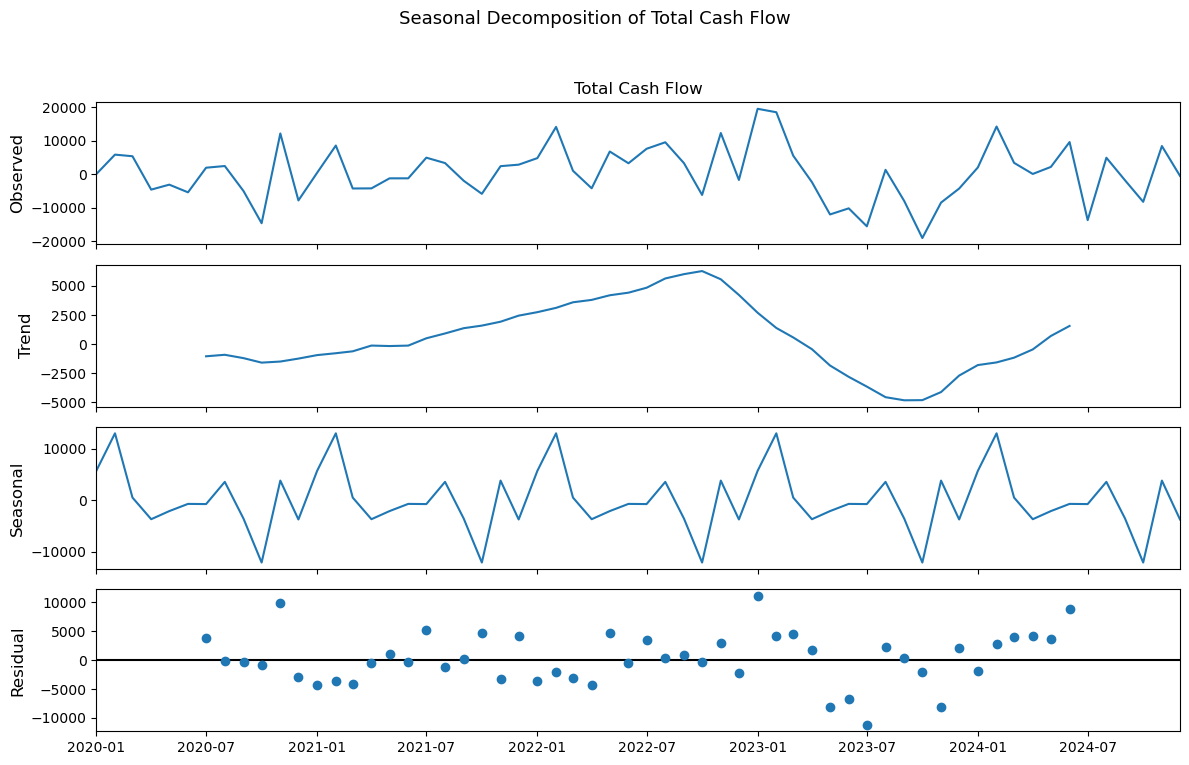

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load and sort data
df = pd.read_csv("data_with_clusters.csv", parse_dates=["datum"])
df = df.sort_values("datum")

# Calculate average monthly total cash flow across all farms
df_monthly = df.groupby("datum")["totale_kasstroom"].mean()

# Rename series to English for clean subplot titles
df_monthly.name = "Total Cash Flow"

# Ensure regular monthly frequency and interpolate missing values
df_monthly = df_monthly.asfreq("MS")
df_monthly = df_monthly.interpolate()

# Perform seasonal decomposition
result = seasonal_decompose(df_monthly, model="additive", period=12)

# Plot decomposition
fig = result.plot()
fig.set_size_inches(12, 8)

# Set main title
plt.suptitle("Seasonal Decomposition of Total Cash Flow", fontsize=13)

# Update subplot y-axis labels with larger font
subplot_labels = ["Observed", "Trend", "Seasonal", "Residual"]
for ax, label in zip(fig.axes, subplot_labels):
    ax.set_ylabel(label, fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


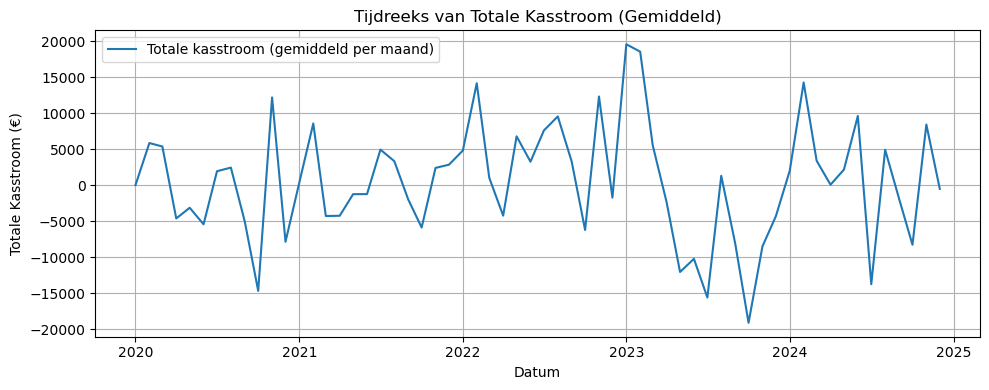

🔎 ADF Test Resultaten
ADF Statistic: -3.3558
p-waarde: 0.0126
Critical Value (1%): -3.5629
Critical Value (5%): -2.9190
Critical Value (10%): -2.5974


In [17]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt

# Laad en aggregeer de dataset
df = pd.read_csv("data_with_clusters.csv", parse_dates=["datum"])
df_monthly = df.groupby("datum")["totale_kasstroom"].mean()

# Plot de tijdreeks
plt.figure(figsize=(10, 4))
plt.plot(df_monthly, label="Totale kasstroom (gemiddeld per maand)")
plt.title("Tijdreeks van Totale Kasstroom (Gemiddeld)")
plt.xlabel("Datum")
plt.ylabel("Totale Kasstroom (€)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Augmented Dickey-Fuller test
result = adfuller(df_monthly.dropna())

print("🔎 ADF Test Resultaten")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-waarde: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")


<Figure size 1000x400 with 0 Axes>

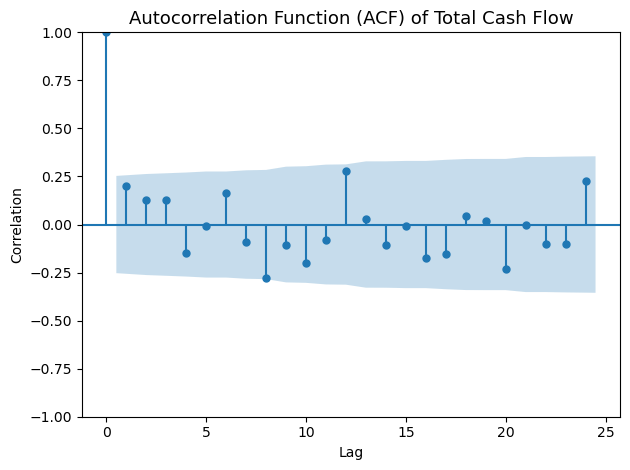

<Figure size 1000x400 with 0 Axes>

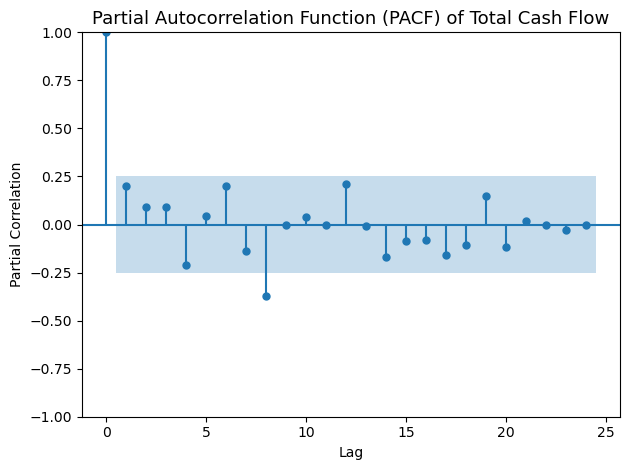

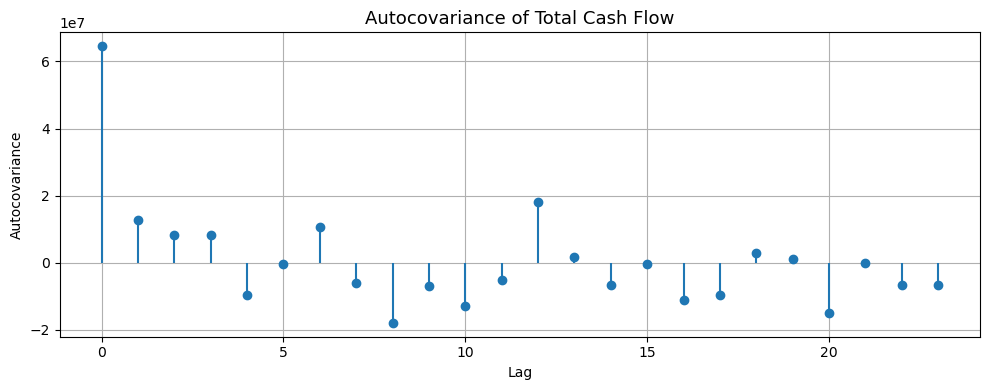

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acovf

# Load and prepare dataset
df = pd.read_csv("data_with_clusters.csv", parse_dates=["datum"])
df = df.sort_values("datum")

# Average total cash flow per month across all farms
df = df.groupby("datum")[["totale_kasstroom"]].mean()
df = df.dropna()

# Dynamically determine number of lags (max 40% of data length)
max_lags = int(len(df) * 0.4)

# Autocorrelation Function (ACF) plot
plt.figure(figsize=(10, 4))
plot_acf(df["totale_kasstroom"], lags=max_lags, alpha=0.05)
plt.title("Autocorrelation Function (ACF) of Total Cash Flow", fontsize=13)
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

# Partial Autocorrelation Function (PACF) plot
plt.figure(figsize=(10, 4))
plot_pacf(df["totale_kasstroom"], lags=max_lags, alpha=0.05, method="ywm")
plt.title("Partial Autocorrelation Function (PACF) of Total Cash Flow", fontsize=13)
plt.xlabel("Lag")
plt.ylabel("Partial Correlation")
plt.tight_layout()
plt.show()

# Autocovariance plot
acov = acovf(df["totale_kasstroom"], demean=True, fft=True)
lags = range(max_lags)

plt.figure(figsize=(10, 4))
plt.stem(lags, acov[:max_lags], basefmt=" ")
plt.title("Autocovariance of Total Cash Flow", fontsize=13)
plt.xlabel("Lag")
plt.ylabel("Autocovariance")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Load dataset and sort by farm and date
df = pd.read_csv("data_with_clusters.csv", parse_dates=["datum"])
df = df.sort_values(["volgnr", "datum"]).reset_index(drop=True)

# Aggregate monthly average values per date (national level)
monthly_avg = df.groupby("datum").agg({
    "totale_kasstroom": "mean",
    "melkprijs_per_kg": "mean",
    "voerkosten": "mean",
    "totaal_opbrengsten": "mean",
    "krachtvoerkosten": "mean",
    "neerslag_(mm)": "mean",
    "gemiddelde_temperatuur": "mean"
}).dropna()

# Rename columns to English
monthly_avg = monthly_avg.rename(columns={
    "totale_kasstroom": "total_cash_flow",
    "melkprijs_per_kg": "milk_price_per_kg",
    "voerkosten": "feed_costs",
    "totaal_opbrengsten": "total_revenue",
    "krachtvoerkosten": "concentrate_feed_costs",
    "neerslag_(mm)": "rainfall_mm",
    "gemiddelde_temperatuur": "average_temperature"
})

# Variables to test for Granger causality
max_lag = 6
variables = [
    "milk_price_per_kg",
    "feed_costs",
    "total_revenue",
    "concentrate_feed_costs",
    "rainfall_mm",
    "average_temperature"
]

# Perform Granger causality tests
results = {}

for var in variables:
    print(f"\nGranger Causality Test: Does '{var}' cause 'total_cash_flow'?")
    test_result = grangercausalitytests(
        monthly_avg[["total_cash_flow", var]],
        maxlag=max_lag,
        verbose=True
    )
    results[var] = test_result



Granger Causality Test: Does 'milk_price_per_kg' cause 'total_cash_flow'?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.5232  , p=0.0050  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=8.9798  , p=0.0027  , df=1
likelihood ratio test: chi2=8.3587  , p=0.0038  , df=1
parameter F test:         F=8.5232  , p=0.0050  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.1882  , p=0.0205  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=9.1665  , p=0.0102  , df=2
likelihood ratio test: chi2=8.5105  , p=0.0142  , df=2
parameter F test:         F=4.1882  , p=0.0205  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.6961  , p=0.0058  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=16.0606 , p=0.0011  , df=3
likelihood ratio test: chi2=14.1495 , p=0.0027  , df=3
parameter F test:         F=4.6961  , p=0.0058  , df_denom=50, df_num=3

Granger Causality
number

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda

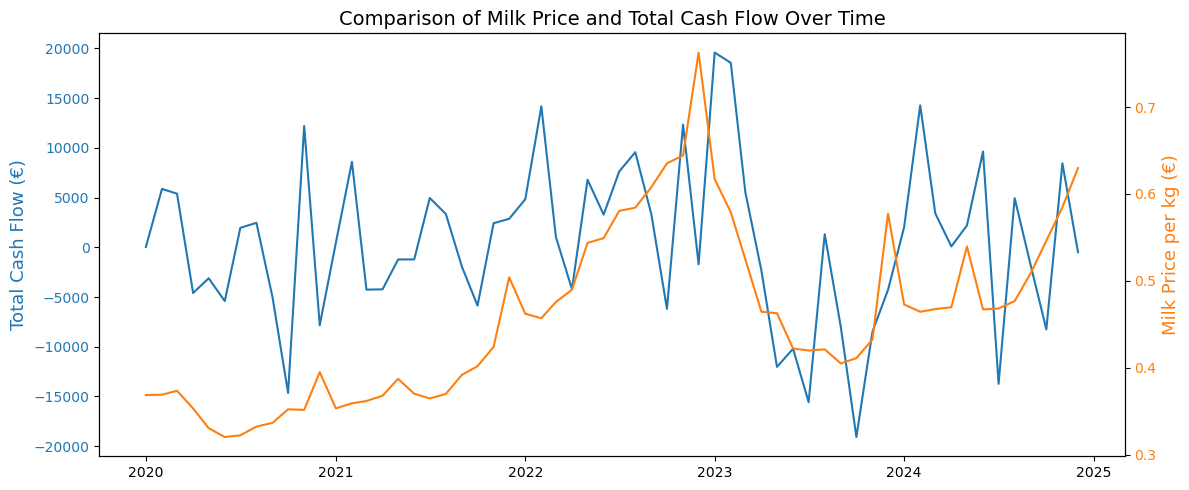

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data_with_clusters.csv", parse_dates=["datum"])
df = df.sort_values("datum")

# Calculate monthly averages
df_avg = df.groupby("datum")[["totale_kasstroom", "melkprijs_per_kg"]].mean().dropna()

# Create plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Left y-axis: total cash flow
ax1.plot(df_avg.index, df_avg["totale_kasstroom"], color='tab:blue', label="Total Cash Flow")
ax1.set_ylabel("Total Cash Flow (€)", color='tab:blue', fontsize=13)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right y-axis: milk price
ax2 = ax1.twinx()
ax2.plot(df_avg.index, df_avg["melkprijs_per_kg"], color='tab:orange', label="Milk Price per kg")
ax2.set_ylabel("Milk Price per kg (€)", color='tab:orange', fontsize=13)
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and layout
plt.title("Comparison of Milk Price and Total Cash Flow Over Time", fontsize=14)
fig.tight_layout()
plt.show()


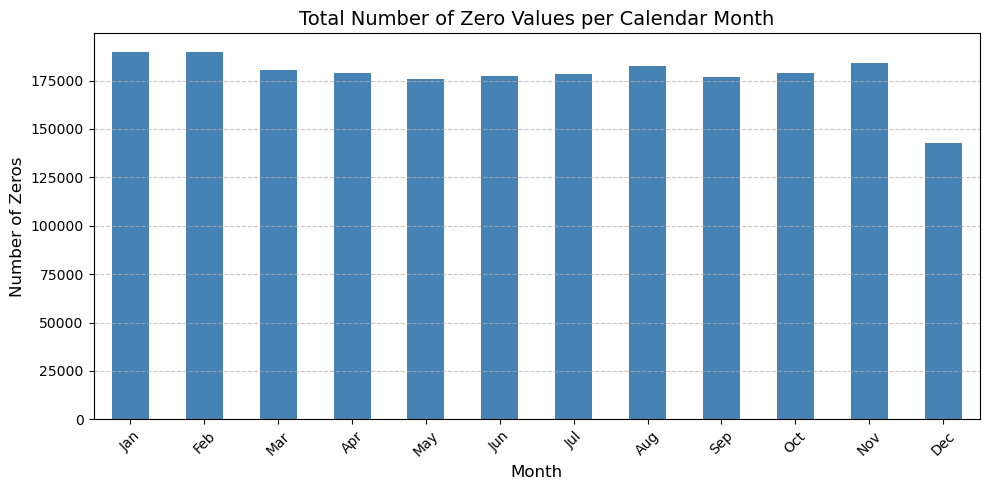

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data_winsorized_financials.csv", parse_dates=["datum"])

# Extract month from date
df["month"] = df["datum"].dt.month

# Count number of zero values per row (excluding irrelevant columns)
columns_to_check = df.drop(columns=["datum", "month", "volgnr"], errors="ignore")
df["zero_count"] = (columns_to_check == 0).sum(axis=1)

# Aggregate total number of zeros per month
zeros_per_month = df.groupby("month")["zero_count"].sum()

# Visualization
plt.figure(figsize=(10, 5))
zeros_per_month.plot(kind="bar", color="steelblue")

# Title and axis labels
plt.title("Total Number of Zero Values per Calendar Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Zeros", fontsize=12)

# Custom x-axis labels
plt.xticks(
    ticks=range(0, 12),
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    rotation=45,
    fontsize=10
)

# Style
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("data_winsorized_financials.csv")

# Select only numeric columns (optionally exclude target variable)
numeric_df = df.select_dtypes(include=[np.number])

# Compute absolute correlation matrix
corr_matrix = numeric_df.corr().abs()

# Extract upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with high correlation (r > 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Report results
print(f"{len(to_drop)} highly correlated features found (correlation > 0.9):")
print(to_drop)


5 highly correlated features found (correlation > 0.9):
['mutatie_crediteuren', 'mutatie_debiteuren', 'voorschot_melkgeld', 'jaar', 'gemiddelde_temperatuur_lag_6']


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data_met_lagged_features.csv")

# Parse the date column and extract year-month
df['datum'] = pd.to_datetime(df['datum'], errors='coerce')
df['year_month'] = df['datum'].dt.to_period('M')

# Define realistic price boundaries for milk and feed prices
min_price = 0
max_price = 5

# Identify outliers outside the realistic range
milk_price_outliers = (df['melkprijs_per_kg'] < min_price) | (df['melkprijs_per_kg'] > max_price)
feed_price_outliers = (df['voerprijs'] < min_price) | (df['voerprijs'] > max_price)

# Count and print the number of outliers
milk_outlier_count = milk_price_outliers.sum()
feed_outlier_count = feed_price_outliers.sum()

print(f"Milk price outliers: {milk_outlier_count} ({milk_outlier_count / len(df):.2%} of total)")
print(f"Feed price outliers: {feed_outlier_count} ({feed_outlier_count / len(df):.2%} of total)")

# Calculate monthly means from valid (non-outlier) values
monthly_milk_mean = df.loc[~milk_price_outliers].groupby('year_month')['melkprijs_per_kg'].mean()
monthly_feed_mean = df.loc[~feed_price_outliers].groupby('year_month')['voerprijs'].mean()

# Impute outliers with the corresponding monthly mean
df.loc[milk_price_outliers, 'melkprijs_per_kg'] = df.loc[milk_price_outliers, 'year_month'].map(monthly_milk_mean)
df.loc[feed_price_outliers, 'voerprijs'] = df.loc[feed_price_outliers, 'year_month'].map(monthly_feed_mean)

# Drop the temporary 'year_month' column
df.drop(columns='year_month', inplace=True)

# Optional: Save the corrected dataset
# df.to_csv("data_corrected.csv", index=False)


Milk price outliers: 1382 (6.48% of total)
Feed price outliers: 49 (0.23% of total)


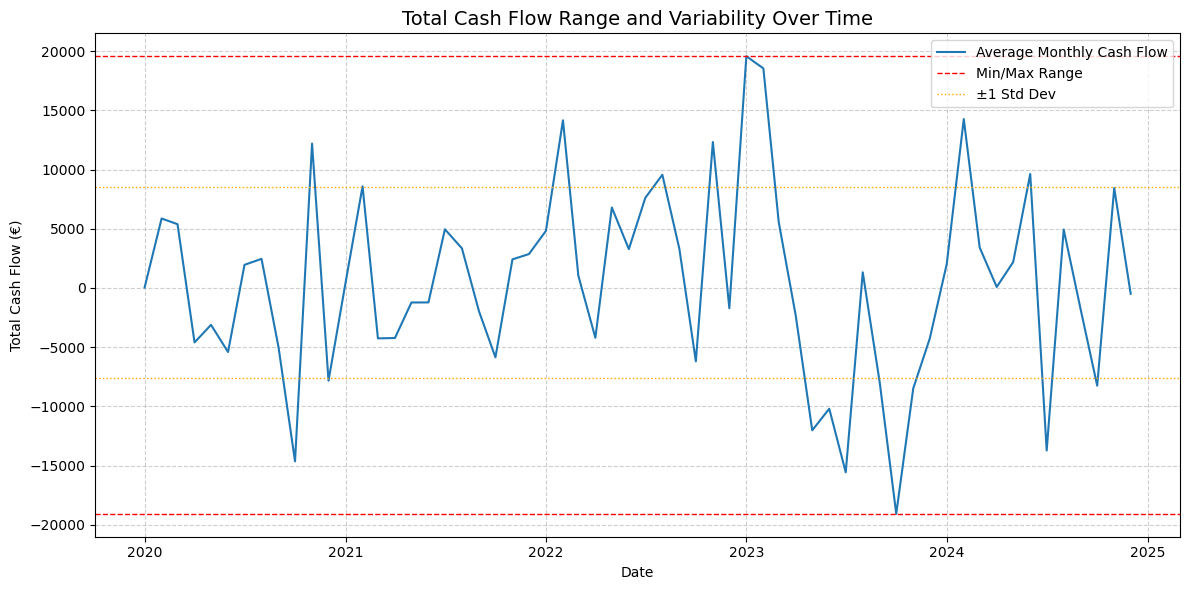

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Laad je dataset
df = pd.read_csv("data_final.csv", parse_dates=["datum"])
df = df.sort_values("datum")

# Gemiddelde kasstroom per maand (optioneel, als je op datum wilt groeperen)
monthly_cashflow = df.groupby("datum")["totale_kasstroom"].mean()

# Statistieken
min_val = monthly_cashflow.min()
max_val = monthly_cashflow.max()
mean_val = monthly_cashflow.mean()
std_val = monthly_cashflow.std()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_cashflow.index, monthly_cashflow, label="Average Monthly Cash Flow", color="tab:blue")

# Range
plt.axhline(min_val, color='red', linestyle='--', linewidth=1, label='Min/Max Range')
plt.axhline(max_val, color='red', linestyle='--', linewidth=1)

# ±1 Std Dev
plt.axhline(mean_val + std_val, color='orange', linestyle=':', linewidth=1, label='±1 Std Dev')
plt.axhline(mean_val - std_val, color='orange', linestyle=':', linewidth=1)

# Styling
plt.title("Total Cash Flow Range and Variability Over Time", fontsize=14)
plt.ylabel("Total Cash Flow (€)")
plt.xlabel("Date")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Laad de dataset
df = pd.read_csv("data_final.csv", parse_dates=["datum"])

# Controleer of 'bedrijf_cluster' en 'totale_kasstroom' aanwezig zijn
required_cols = {"bedrijf_cluster", "totale_kasstroom"}
if not required_cols.issubset(df.columns):
    raise ValueError(f"Vereiste kolommen ontbreken: {required_cols - set(df.columns)}")

# Groepeer per cluster en beschrijf alleen de kasstroom
kasstroom_stats = df.groupby("bedrijf_cluster")["totale_kasstroom"].describe()

# Print resultaat
print("Descriptieve statistieken van totale kasstroom per cluster:\n")
print(kasstroom_stats)

# Optioneel: opslaan
kasstroom_stats.to_csv("kasstroom_stats_per_cluster.csv")


Descriptieve statistieken van totale kasstroom per cluster:

                   count        mean            std        min       25%  \
bedrijf_cluster                                                            
0                16944.0  376.555300   43241.065841 -1085121.0 -10074.25   
1                 3780.0  936.925132  116597.689560 -2119926.0 -16501.75   
2                  600.0 -173.213333   50065.978930  -324370.0 -13454.00   

                    50%      75%        max  
bedrijf_cluster                              
0                1143.5  12571.0  1346454.0  
1                 531.5  17694.5  2242971.0  
2                   0.0  14577.5   473098.0  
